In [11]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import (BinaryClassificationEvaluator,
                                    MulticlassClassificationEvaluator)
from pyspark.ml.feature import (StringIndexer, VectorAssembler,
                               OneHotEncoder)
from pyspark.sql.session import SparkSession
from pyspark.ml import Pipeline
from pyspark.sql.functions import col, sum
from pyspark.ml.classification import (RandomForestClassifier,
                                       GBTClassifier,
                                       DecisionTreeClassifier)
import xgboost as xgb
from imblearn.over_sampling import SMOTE
import pandas as pd
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import pandas as pd
from pyspark.ml.feature import VectorAssembler, StandardScaler


In [4]:
import findspark
spark = findspark.init('/home/danial/spark-3.4.0-bin-hadoop3')

In [23]:
import pandas as pd
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import (BinaryClassificationEvaluator,
                                    MulticlassClassificationEvaluator)
from pyspark.ml.feature import (StringIndexer, VectorAssembler,
                               OneHotEncoder)
from pyspark.sql.session import SparkSession
from pyspark.ml import Pipeline
from pyspark.sql.functions import col, sum
from pyspark.ml.classification import (RandomForestClassifier,
                                       GBTClassifier,
                                       DecisionTreeClassifier)
import matplotlib.pyplot as plt
path = '/home/danial/Desktop/mygis/Geospatial_Data_Science/My GIS Projects/'


In [5]:
spark = SparkSession.builder.config('spark.jars.packages', 'org.xerial:sqlite-jdbc:3.42.0.0').getOrCreate()

23/06/19 12:13:30 WARN Utils: Your hostname, danial-VirtualBox resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
23/06/19 12:13:30 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/home/danial/spark-3.4.0-bin-hadoop3/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/danial/.ivy2/cache
The jars for the packages stored in: /home/danial/.ivy2/jars
org.xerial#sqlite-jdbc added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-50f7d6d7-1b2f-4ed4-ac64-a0d560c11ca8;1.0
	confs: [default]
	found org.xerial#sqlite-jdbc;3.42.0.0 in central
:: resolution report :: resolve 220ms :: artifacts dl 11ms
	:: modules in use:
	org.xerial#sqlite-jdbc;3.42.0.0 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   1   |   0   |   0   |   0   ||   1   |   0   |
	---------------------------------------------------------------------
:: retrieving :: org.apache.spark#spark-submit-parent-50f7d6d7-1b2f-4ed4-ac64-a0d560c11ca8
	confs: [defa

In [6]:
df_spark = spark.read.format('jdbc').options(driver='org.sqlite.JDBC', \
                                             inferSchema = True,\
                                             header = True,\
                                             dbtable = 'fires',\
                                             url= 'jdbc:sqlite:/home/danial/Desktop/mygis/Geospatial_Data_Science/My GIS Projects/data/3.1.88_M_US_Wildfires/FPA_FOD_20170508.sqlite').load()


In [ ]:
# this is for windows 

In [2]:
spark = SparkSession.builder.config('spark.jars.packages', 'org.xerial:sqlite-jdbc:3.42.0.0').getOrCreate()
df_spark = spark.read.format('jdbc').options(driver='org.sqlite.JDBC', \
                                             inferSchema = True,\
                                             header = True,\
                                             dbtable = 'fires',\
                                             url= 'jdbc:sqlite:/D:/0_Machine_Learning/0.my_code_excercise/0.My_Portfolio/27.mygis/FPA_FOD_20170508.sqlite').load()



In [7]:
def data_reader(df_spark):
    
    selected_col = ['FIRE_SIZE', 'FIRE_SIZE_CLASS',\
               'STATE','FIRE_YEAR', 'DISCOVERY_DOY', \
                'STAT_CAUSE_CODE','DISCOVERY_TIME', 'CONT_TIME'] # 'CONT_DOY', # 'LONGITUDE', 'LATITUDE',
    
    df = df_spark.select(selected_col)
    
    df = df.withColumn("FIRE_SIZE", df.FIRE_SIZE.cast("double"))
    df = df.withColumn("FIRE_YEAR", df.FIRE_YEAR.cast("integer"))
    df = df.withColumn("DISCOVERY_DOY", df.DISCOVERY_DOY.cast("integer"))
    #df = df.withColumn("CONT_DOY", df.CONT_DOY.cast("integer"))
    df = df.withColumn("STAT_CAUSE_CODE", df.STAT_CAUSE_CODE.cast("integer"))

    return df

In [8]:
my_df = data_reader(df_spark)
my_df.show(n=4)

+---------+---------------+-----+---------+-------------+---------------+--------------+---------+
|FIRE_SIZE|FIRE_SIZE_CLASS|STATE|FIRE_YEAR|DISCOVERY_DOY|STAT_CAUSE_CODE|DISCOVERY_TIME|CONT_TIME|
+---------+---------------+-----+---------+-------------+---------------+--------------+---------+
|      0.1|              A|   CA|     2005|           33|              9|          1300|     1730|
|     0.25|              A|   CA|     2004|          133|              1|          0845|     1530|
|      0.1|              A|   CA|     2004|          152|              5|          1921|     2024|
|      0.1|              A|   CA|     2004|          180|              1|          1600|     1400|
+---------+---------------+-----+---------+-------------+---------------+--------------+---------+
only showing top 4 rows



In [9]:
desired_cols = ['FIRE_SIZE_CLASS', 'STATE', 'FIRE_YEAR', 'DISCOVERY_DOY', 'STAT_CAUSE_CODE']

df_final = my_df.select(desired_cols)


indexer = StringIndexer(inputCol='FIRE_SIZE_CLASS', outputCol='FIRE_SIZE_CLASS_index')

indexed_df = indexer.fit(df_final).transform(df_final)

STATE_indexer = StringIndexer(inputCol='STATE', outputCol='STATE_Index')

my_df_final = STATE_indexer.fit(indexed_df).transform(indexed_df)

inputCols = ['STATE_Index', 'FIRE_YEAR', 'DISCOVERY_DOY', 'STAT_CAUSE_CODE']

my_df_final = my_df_final.select('FIRE_YEAR','DISCOVERY_DOY','STAT_CAUSE_CODE','FIRE_SIZE_CLASS_index','STATE_Index')
#assembler = VectorAssembler(inputCols=inputCols, outputCol='raw_features')

#scaler = StandardScaler(inputCol='raw_features', outputCol='features', withMean=True, withStd=True)



In [10]:
my_df_final.show()

+---------+-------------+---------------+---------------------+-----------+
|FIRE_YEAR|DISCOVERY_DOY|STAT_CAUSE_CODE|FIRE_SIZE_CLASS_index|STATE_Index|
+---------+-------------+---------------+---------------------+-----------+
|     2005|           33|              9|                  1.0|        0.0|
|     2004|          133|              1|                  1.0|        0.0|
|     2004|          152|              5|                  1.0|        0.0|
|     2004|          180|              1|                  1.0|        0.0|
|     2004|          180|              1|                  1.0|        0.0|
|     2004|          182|              1|                  1.0|        0.0|
|     2004|          183|              1|                  1.0|        0.0|
|     2005|           67|              5|                  0.0|        0.0|
|     2005|           74|              5|                  0.0|        0.0|
|     2004|          183|              1|                  1.0|        0.0|
|     2004| 

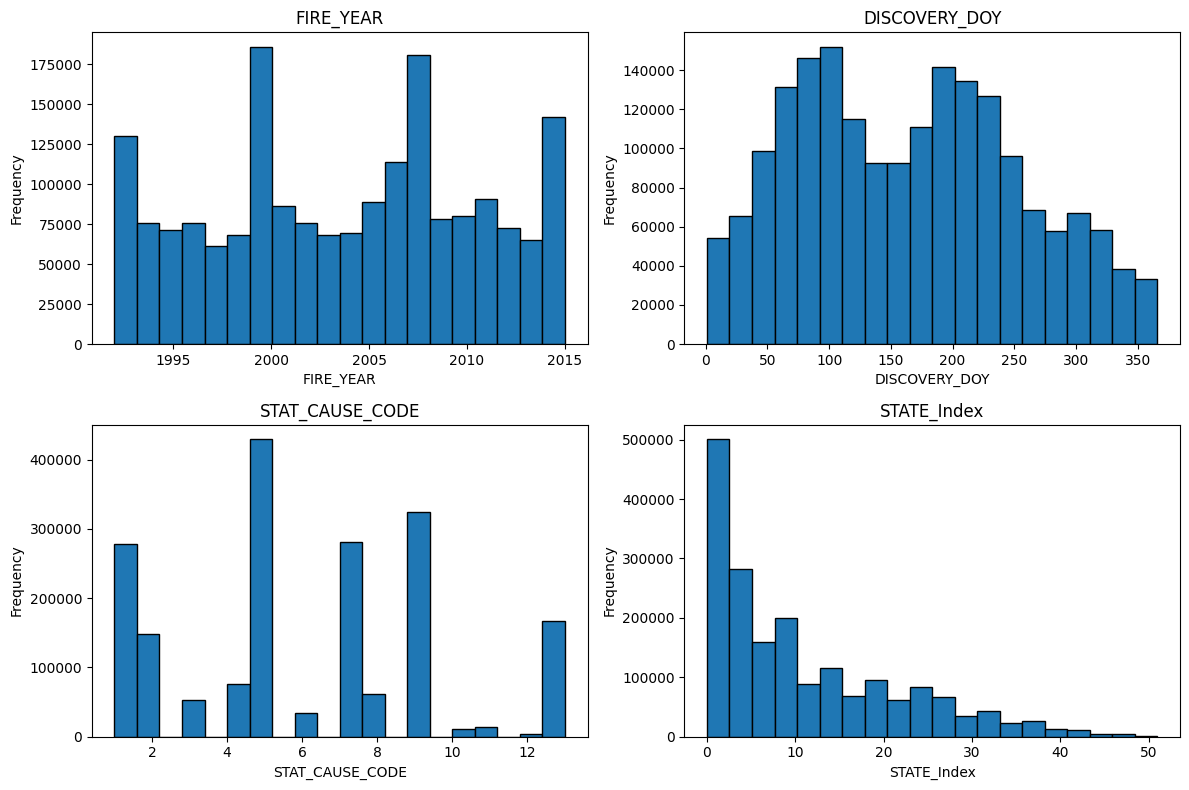

In [26]:
df = my_df_final.toPandas()
# Select the features for plotting
features_to_plot = ['FIRE_YEAR', 'DISCOVERY_DOY', 'STAT_CAUSE_CODE', 'STATE_Index']

# Create subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot histograms for each feature
for ax, feature in zip(axes.flatten(), features_to_plot):
    ax.hist(df[feature], bins=20, edgecolor='black')
    ax.set_title(f"{feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")

# Adjust spacing between subplots
plt.tight_layout()

plt.savefig(path + 'plots/distribution_of_features.png')
#plt.show()


In [15]:
features = my_df_final.drop('FIRE_SIZE_CLASS_index')
label = my_df_final.select('FIRE_SIZE_CLASS_index')

In [41]:
features.show()

+---------+-------------+---------------+-----------+
|FIRE_YEAR|DISCOVERY_DOY|STAT_CAUSE_CODE|STATE_Index|
+---------+-------------+---------------+-----------+
|     2005|           33|              9|        0.0|
|     2004|          133|              1|        0.0|
|     2004|          152|              5|        0.0|
|     2004|          180|              1|        0.0|
|     2004|          180|              1|        0.0|
|     2004|          182|              1|        0.0|
|     2004|          183|              1|        0.0|
|     2005|           67|              5|        0.0|
|     2005|           74|              5|        0.0|
|     2004|          183|              1|        0.0|
|     2004|          184|              1|        0.0|
|     2004|          184|              1|        0.0|
|     2004|          247|              9|        0.0|
|     2004|          272|              4|        0.0|
|     2004|          277|              1|        0.0|
|     2004|          277|   

In [18]:
# Create a list of input column names
inputCols = features.columns

# Assemble the input columns into a vector column
assembler = VectorAssembler(inputCols=inputCols, outputCol="features")
assembled_df = assembler.transform(my_df_final)

# Apply feature scaling using StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withMean=True, withStd=True)
scaled_df = scaler.fit(assembled_df).transform(assembled_df)

# # Select the scaled features
# scaled_features_df = scaled_df.select("scaled_features")



In [19]:
scaled_df.head(4)

[Row(FIRE_YEAR=2005, DISCOVERY_DOY=33, STAT_CAUSE_CODE=9, FIRE_SIZE_CLASS_index=1.0, STATE_Index=0.0, features=DenseVector([2005.0, 33.0, 9.0, 0.0]), scaled_features=DenseVector([0.1936, -1.4629, 0.8671, -1.0326])),
 Row(FIRE_YEAR=2004, DISCOVERY_DOY=133, STAT_CAUSE_CODE=1, FIRE_SIZE_CLASS_index=1.0, STATE_Index=0.0, features=DenseVector([2004.0, 133.0, 1.0, 0.0]), scaled_features=DenseVector([0.0435, -0.3523, -1.4292, -1.0326])),
 Row(FIRE_YEAR=2004, DISCOVERY_DOY=152, STAT_CAUSE_CODE=5, FIRE_SIZE_CLASS_index=1.0, STATE_Index=0.0, features=DenseVector([2004.0, 152.0, 5.0, 0.0]), scaled_features=DenseVector([0.0435, -0.1413, -0.281, -1.0326])),
 Row(FIRE_YEAR=2004, DISCOVERY_DOY=180, STAT_CAUSE_CODE=1, FIRE_SIZE_CLASS_index=1.0, STATE_Index=0.0, features=DenseVector([2004.0, 180.0, 1.0, 0.0]), scaled_features=DenseVector([0.0435, 0.1697, -1.4292, -1.0326]))]

In [20]:
data = scaled_df.select('scaled_features', 'FIRE_SIZE_CLASS_index')

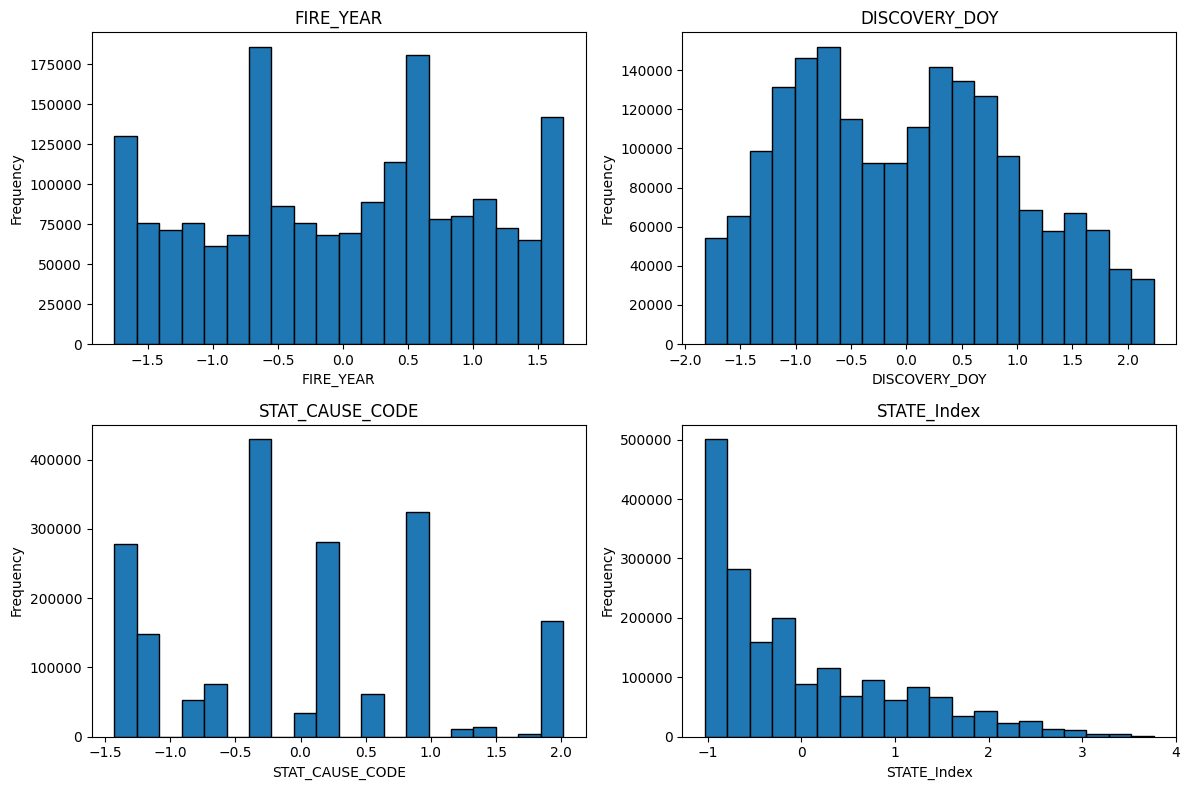

In [28]:
# Convert the scaled_features column to a pandas DataFrame
scaled_features_pd = data.select('scaled_features').toPandas()

# Iterate over each row and extract the features
features_list = []
for row in scaled_features_pd['scaled_features']:
    features_list.append(row.toArray())

# Create a DataFrame with the features
features_df = pd.DataFrame(features_list, columns=inputCols)

# Create subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot histograms for each feature
for ax, feature in zip(axes.flatten(), inputCols):
    ax.hist(features_df[feature], bins=20, edgecolor='black')
    ax.set_title(f"{feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")

# Adjust spacing between subplots
plt.tight_layout()

#plt.savefig(path + 'plots/distribution_of_scaled_features.png')
plt.show()


In [74]:
features.show()

+---------+-------------+---------------+-----------+
|FIRE_YEAR|DISCOVERY_DOY|STAT_CAUSE_CODE|STATE_Index|
+---------+-------------+---------------+-----------+
|     2005|           33|              9|        0.0|
|     2004|          133|              1|        0.0|
|     2004|          152|              5|        0.0|
|     2004|          180|              1|        0.0|
|     2004|          180|              1|        0.0|
|     2004|          182|              1|        0.0|
|     2004|          183|              1|        0.0|
|     2005|           67|              5|        0.0|
|     2005|           74|              5|        0.0|
|     2004|          183|              1|        0.0|
|     2004|          184|              1|        0.0|
|     2004|          184|              1|        0.0|
|     2004|          247|              9|        0.0|
|     2004|          272|              4|        0.0|
|     2004|          277|              1|        0.0|
|     2004|          277|   

In [83]:
data.show()

+--------------------+---------------------+
|     scaled_features|FIRE_SIZE_CLASS_index|
+--------------------+---------------------+
|[0.19360746160853...|                  1.0|
|[0.04352713699106...|                  1.0|
|[0.04352713699106...|                  1.0|
|[0.04352713699106...|                  1.0|
|[0.04352713699106...|                  1.0|
|[0.04352713699106...|                  1.0|
|[0.04352713699106...|                  1.0|
|[0.19360746160853...|                  0.0|
|[0.19360746160853...|                  0.0|
|[0.04352713699106...|                  1.0|
|[0.04352713699106...|                  1.0|
|[0.04352713699106...|                  1.0|
|[0.04352713699106...|                  1.0|
|[0.04352713699106...|                  0.0|
|[0.04352713699106...|                  1.0|
|[0.04352713699106...|                  1.0|
|[0.04352713699106...|                  6.0|
|[0.04352713699106...|                  6.0|
|[0.04352713699106...|                  1.0|
|[0.043527

In [84]:
log_reg_model = LogisticRegression(featuresCol='scaled_features', labelCol='FIRE_SIZE_CLASS_index', family="multinomial")

train_data, test_data = data.randomSplit([0.7, 0.3])

fit_model = log_reg_model.fit(train_data)

predictions = fit_model.transform(test_data)

outputCol = 'FIRE_SIZE_CLASS_index'
#evaluator = MulticlassClassificationEvaluator(labelCol="FIRE_SIZE_CLASS_Index", metricName="accuracy")
evaluator = MulticlassClassificationEvaluator(labelCol=outputCol, metricName="accuracy")

accuracy = evaluator.evaluate(predictions)

evaluator = MulticlassClassificationEvaluator(labelCol=outputCol, metricName="f1")
f_1_score = evaluator.evaluate(predictions)

evaluator = MulticlassClassificationEvaluator(labelCol=outputCol, metricName="weightedPrecision")
weighted_Precision = evaluator.evaluate(predictions)

evaluator = MulticlassClassificationEvaluator(labelCol=outputCol, metricName="weightedRecall")
weighted_Recall = evaluator.evaluate(predictions)

# Compute confusion matrix
predictionAndLabels = predictions.select("prediction", outputCol)
confusionMatrix = predictionAndLabels.groupBy(outputCol, "prediction").count()

# Collect the confusion matrix into a Pandas DataFrame
confusionMatrix = confusionMatrix.toPandas()

# Pivot the confusion matrix
confusionMatrix = confusionMatrix.pivot(index=outputCol, columns="prediction", values="count").fillna(0)

In [86]:
print (f"Acuuracy = {accuracy}\n"
       f"f1_score = {f_1_score}, \n"
       f"weighted_Precision = {weighted_Precision}, \n"
       f"weighted_Recall = {weighted_Recall}, \n"
       f"confusionMatrix: \n"
       f"{confusionMatrix}, \n")
#       f"classification_metrics: \n"
#        f"{classification_metrics}")

Acuuracy = 0.5045560747663551
f1_score = 0.4304224595842838, 
weighted_Precision = 0.4159376694496627, 
weighted_Recall = 0.5045560747663551, 
confusionMatrix: 
prediction                0.0    1.0
FIRE_SIZE_CLASS_index               
0.0                    237340  44665
1.0                    152768  47714
2.0                     55197  11037
3.0                      6565   1917
4.0                      2993   1254
5.0                      1429    953
6.0                       559    569, 



In [87]:
train_data.show()

+--------------------+---------------------+
|     scaled_features|FIRE_SIZE_CLASS_index|
+--------------------+---------------------+
|[-1.7574367584186...|                  1.0|
|[-1.7574367584186...|                  1.0|
|[-1.7574367584186...|                  1.0|
|[-1.7574367584186...|                  2.0|
|[-1.7574367584186...|                  0.0|
|[-1.7574367584186...|                  0.0|
|[-1.7574367584186...|                  1.0|
|[-1.7574367584186...|                  0.0|
|[-1.7574367584186...|                  0.0|
|[-1.7574367584186...|                  0.0|
|[-1.7574367584186...|                  0.0|
|[-1.7574367584186...|                  0.0|
|[-1.7574367584186...|                  0.0|
|[-1.7574367584186...|                  0.0|
|[-1.7574367584186...|                  0.0|
|[-1.7574367584186...|                  2.0|
|[-1.7574367584186...|                  0.0|
|[-1.7574367584186...|                  0.0|
|[-1.7574367584186...|                  0.0|
|[-1.75743

In [93]:
features_list

[array([ 0.19360746, -1.4629136 ,  0.86713092, -1.03260826]),
 array([ 0.04352714, -0.35228264, -1.42917247, -1.03260826]),
 array([ 0.04352714, -0.14126276, -0.28102078, -1.03260826]),
 array([ 0.04352714,  0.16971391, -1.42917247, -1.03260826]),
 array([ 0.04352714,  0.16971391, -1.42917247, -1.03260826]),
 array([ 0.04352714,  0.19192653, -1.42917247, -1.03260826]),
 array([ 0.04352714,  0.20303284, -1.42917247, -1.03260826]),
 array([ 0.19360746, -1.08529908, -0.28102078, -1.03260826]),
 array([ 0.19360746, -1.00755491, -0.28102078, -1.03260826]),
 array([ 0.04352714,  0.20303284, -1.42917247, -1.03260826]),
 array([ 0.04352714,  0.21413914, -1.42917247, -1.03260826]),
 array([ 0.04352714,  0.21413914, -1.42917247, -1.03260826]),
 array([ 0.04352714,  0.91383665,  0.86713092, -1.03260826]),
 array([ 0.04352714,  1.19149439, -0.5680587 , -1.03260826]),
 array([ 0.04352714,  1.24702594, -1.42917247, -1.03260826]),
 array([ 0.04352714,  1.24702594, -1.42917247, -1.03260826]),
 array([